<a href="https://colab.research.google.com/github/NandaniTripathi/IPL-dataset-analysis/blob/main/project_ipl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import libraries and load dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [4]:
deliveries = pd.read_csv('deliveries.csv')
matches = pd.read_csv('matches.csv')


In [5]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0.0,1.0,1.0,legbyes,0.0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0.0,1.0,1.0,wides,0.0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN


In [6]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [7]:
matches.shape

(1095, 20)

In [8]:
deliveries.shape

(50997, 17)

In [9]:
matches['team1'].value_counts()

,count
team1,
Royal Challengers Bangalore,135
Chennai Super Kings,128
Mumbai Indians,123
Kolkata Knight Riders,121
Rajasthan Royals,101
Kings XI Punjab,92
Sunrisers Hyderabad,86
Delhi Daredevils,85
Delhi Capitals,41


In [10]:
matches['team2'].value_counts()

,count
team2,
Mumbai Indians,138
Kolkata Knight Riders,130
Rajasthan Royals,120
Chennai Super Kings,110
Royal Challengers Bangalore,105
Kings XI Punjab,98
Sunrisers Hyderabad,96
Delhi Daredevils,76
Delhi Capitals,50


In [11]:
deliveries['batting_team'].value_counts()

,count
batting_team,
Chennai Super Kings,6501
Deccan Chargers,6486
Royal Challengers Bangalore,6266
Mumbai Indians,6152
Delhi Daredevils,6051
Kings XI Punjab,5992
Rajasthan Royals,5962
Kolkata Knight Riders,5730
Pune Warriors,934


data cleaning

In [12]:
matches['team1'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)
matches['team2'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)
matches['toss_winner'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)
matches['winner'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)

<ipython-input-12-f4d1ee4b8257>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['team1'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)
<ipython-input-12-f4d1ee4b8257>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[

In [13]:
matches['team1'].replace({'Royal Challengers Bengaluru':'Royal Challengers Bangalore'},inplace=True)
matches['team2'].replace({'Royal Challengers Bengaluru':'Royal Challengers Bangalore'},inplace=True)
matches['toss_winner'].replace({'Royal Challengers Bengaluru':'Royal Challengers Bangalore'},inplace=True)
matches['winner'].replace({'Royal Challengers Bengaluru':'Royal Challengers Bangalore'},inplace=True)

In [14]:
matches['team2'].value_counts()

,count
team2,
Mumbai Indians,138
Kolkata Knight Riders,130
Rajasthan Royals,120
Royal Challengers Bangalore,111
Chennai Super Kings,110
Kings XI Punjab,98
Sunrisers Hyderabad,96
Delhi Daredevils,76
Delhi Capitals,50


In [15]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0.0,1.0,1.0,legbyes,0.0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0.0,1.0,1.0,wides,0.0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN


In [16]:
deliveries['batting_team'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)
deliveries['bowling_team'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)

deliveries['batting_team'].replace({'Royal Challengers Bengaluru':'Royal Challengers Bangalore'},inplace=True)
deliveries['bowling_team'].replace({'Royal Challengers Bengaluru':'Royal Challengers Bangalore'},inplace=True)

<ipython-input-16-95aa4c7cf1ba>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  deliveries['batting_team'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)
<ipython-input-16-95aa4c7cf1ba>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

In [17]:
deliveries['batting_team'].value_counts()

,count
batting_team,
Chennai Super Kings,6501
Deccan Chargers,6486
Royal Challengers Bangalore,6266
Mumbai Indians,6152
Delhi Daredevils,6051
Kings XI Punjab,5992
Rajasthan Royals,5962
Kolkata Knight Riders,5730
Pune Warriors,934


In [18]:
matches['city'].isna().sum()

np.int64(51)

In [19]:
matches['method'].value_counts()

,count
method,
D/L,21


In [20]:
matches['city'].fillna('Unknown',inplace=True)
matches['method'].fillna('Non D/L',inplace=True)

<ipython-input-20-2253e66ac9a7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['city'].fillna('Unknown',inplace=True)
<ipython-input-20-2253e66ac9a7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

success rate of terms

In [21]:
def random_colors(no_of_colors):
    return ['#'+''.join([np.random.choice(list('0123456789ABCDEF')) for _ in range(6)]) for _ in range(no_of_colors)]

In [22]:
random_colors(6)

['#2B5ABE', '#421C01', '#C76CC0', '#4AFA22', '#E19770', '#2C3009']

<ipython-input-23-44f37f6859a4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=success_ratio_desc.index,y=success_ratio_desc.values, palette=random_colors(len(success_ratio_desc)))


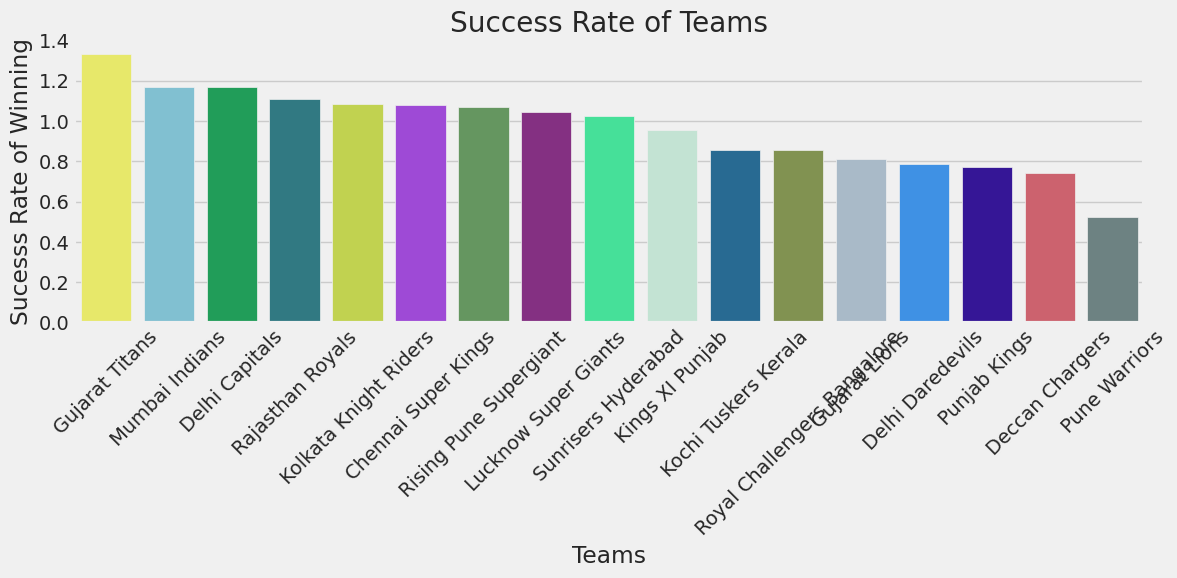

In [23]:
success_ratio = matches.groupby('winner').count()['id']/matches.groupby('team1').count()['id']
success_ratio_desc = success_ratio.sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=success_ratio_desc.index,y=success_ratio_desc.values, palette=random_colors(len(success_ratio_desc)))
plt.title('Success Rate of Teams')
plt.xlabel('Teams')
plt.ylabel('Sucesss Rate of Winning')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

<ipython-input-24-ec527deb8ebf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=winner_counts.index,y=winner_counts.values, palette=random_colors(len(winner_counts)))


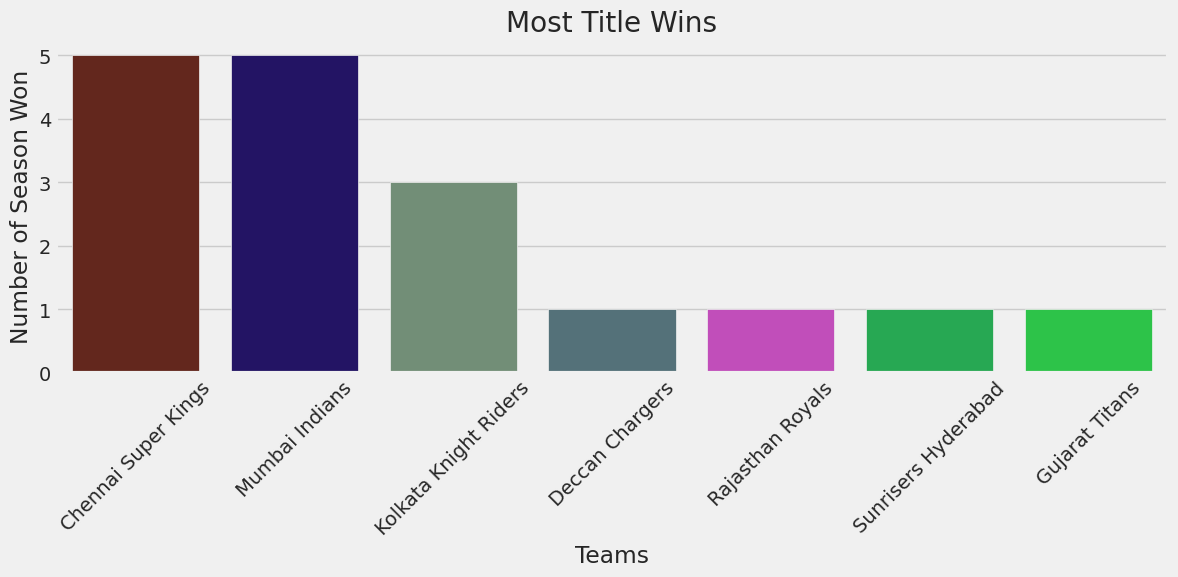

In [24]:
winner_counts = matches.groupby('season')[['season','winner']].tail(1)['winner'].value_counts()


plt.figure(figsize=(12,6))
sns.barplot(x=winner_counts.index,y=winner_counts.values, palette=random_colors(len(winner_counts)))
plt.title('Most Title Wins')
plt.xlabel('Teams')
plt.ylabel('Number of Season Won')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

<ipython-input-25-2f2ea13e0417>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='batter',y='Runs', data= top_batsmen, palette=random_colors(10))


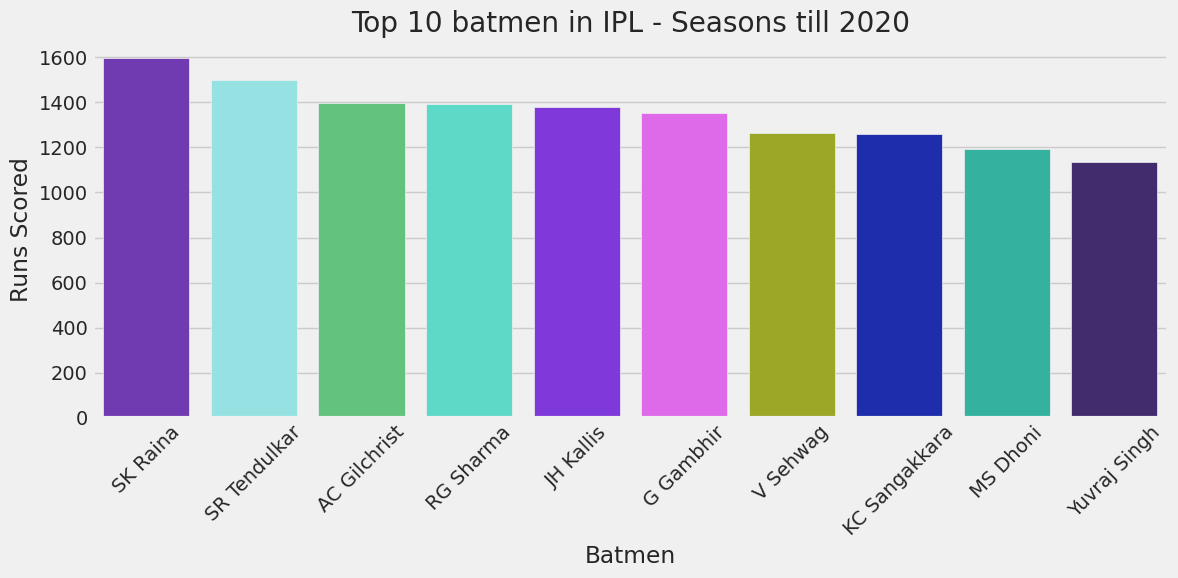

In [25]:
batting_tot = deliveries.groupby('batter')['batsman_runs'].sum().reset_index(name='Runs')
top_batsmen = batting_tot.sort_values(by='Runs',ascending=False)[:10]

plt.figure(figsize=(12,6))
sns.barplot(x='batter',y='Runs', data= top_batsmen, palette=random_colors(10))
plt.title('Top 10 batmen in IPL - Seasons till 2020')
plt.xlabel('Batmen')
plt.ylabel('Runs Scored')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

top 10 best performances in a match

In [26]:
deliveries.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0.0,1.0,1.0,legbyes,0.0,NaN,NaN,NaN


In [27]:
batting_ings = deliveries.groupby(['match_id', 'batter'])['batsman_runs'].sum().reset_index(name='Innings Runs')
top_batsmen_scores = batting_ings.sort_values(by='Innings Runs',ascending=False)[:10]

In [ ]:
batsman_ball_faced = deliveries.groupby(['match_id', 'batter'])['batsman_runs'].count().reset_index(name='Balls Faced')

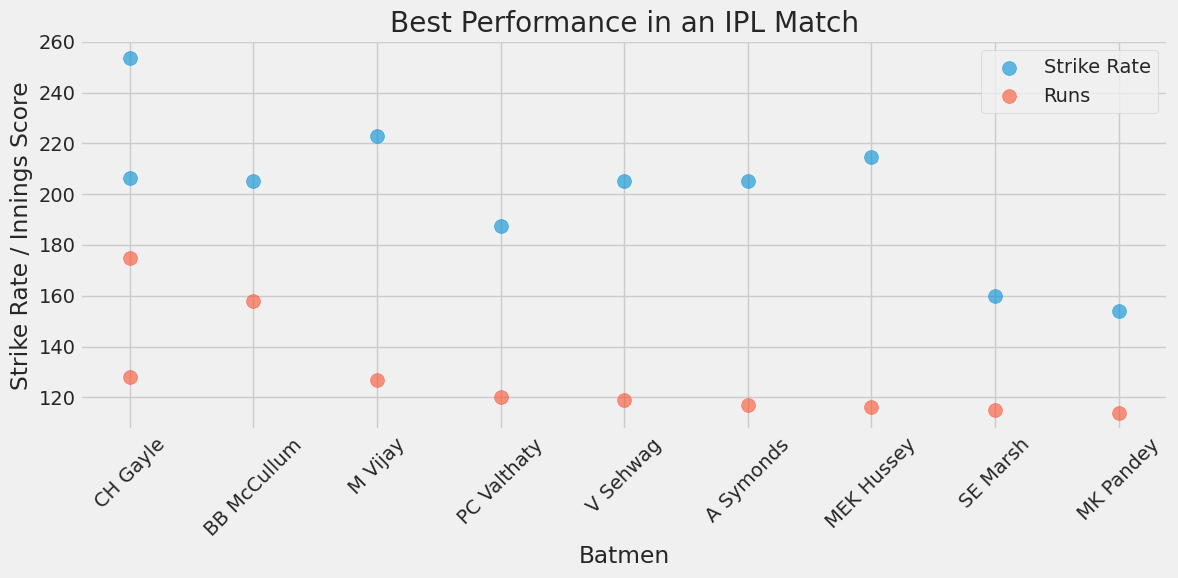

In [ ]:
batsmen_performance = pd.merge(top_batsmen_scores,batsman_ball_faced,how='inner', on=['match_id','batter'])
batsmen_performance['Strike Rate for Match'] = np.round(batsmen_performance['Innings Runs']*100/batsmen_performance['Balls Faced'],2)
batsmen_performance

plt.figure(figsize=(12,6))
plt.scatter(batsmen_performance['batter'],batsmen_performance['Strike Rate for Match'], label='Strike Rate',s=100, alpha=0.6)
plt.scatter(batsmen_performance['batter'],batsmen_performance['Innings Runs'], label='Runs',s=100, alpha=0.6)
plt.title('Best Performance in an IPL Match')
plt.xlabel('Batmen')
plt.ylabel('Strike Rate / Innings Score')
plt.legend()
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

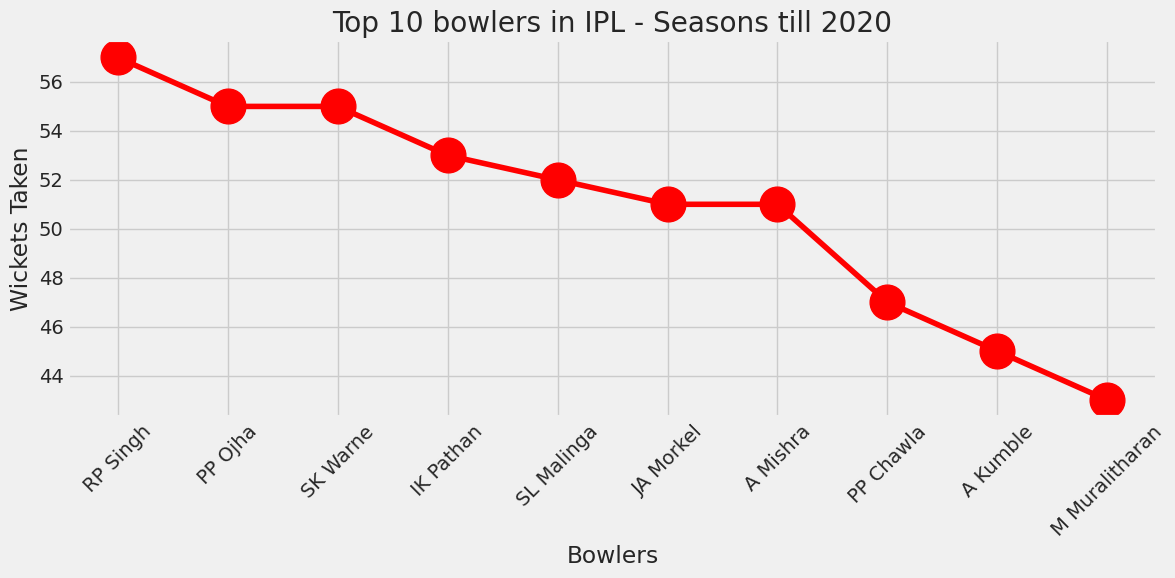

In [28]:
bowling_wickets = deliveries[deliveries['dismissal_kind'] != 'run out']
top_bowlers = bowling_wickets.groupby('bowler')['dismissal_kind'].count().reset_index(
    name='Wickets').sort_values(by='Wickets',ascending=False)[:10]

plt.figure(figsize=(12,6))
plt.plot(top_bowlers['bowler'],top_bowlers['Wickets'], marker= 'o',color='red',ms=25)
plt.title('Top 10 bowlers in IPL - Seasons till 2020')
plt.xlabel('Bowlers')
plt.ylabel('Wickets Taken')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

top 10 bowling performances till 2020

In [29]:
match_bowling_top = bowling_wickets.groupby(['match_id','bowler'])['dismissal_kind'].count().reset_index(
    name='Wickets').sort_values(by='Wickets',ascending=False)[:10]

In [30]:
match_bowler_runs = deliveries.groupby(['match_id','bowler'])['total_runs'].sum().reset_index(name='Runs Conceded')

In [34]:
match_bowler_performance = pd.merge(match_bowler_runs,match_bowling_top,how='inner', on =['match_id','bowler'])

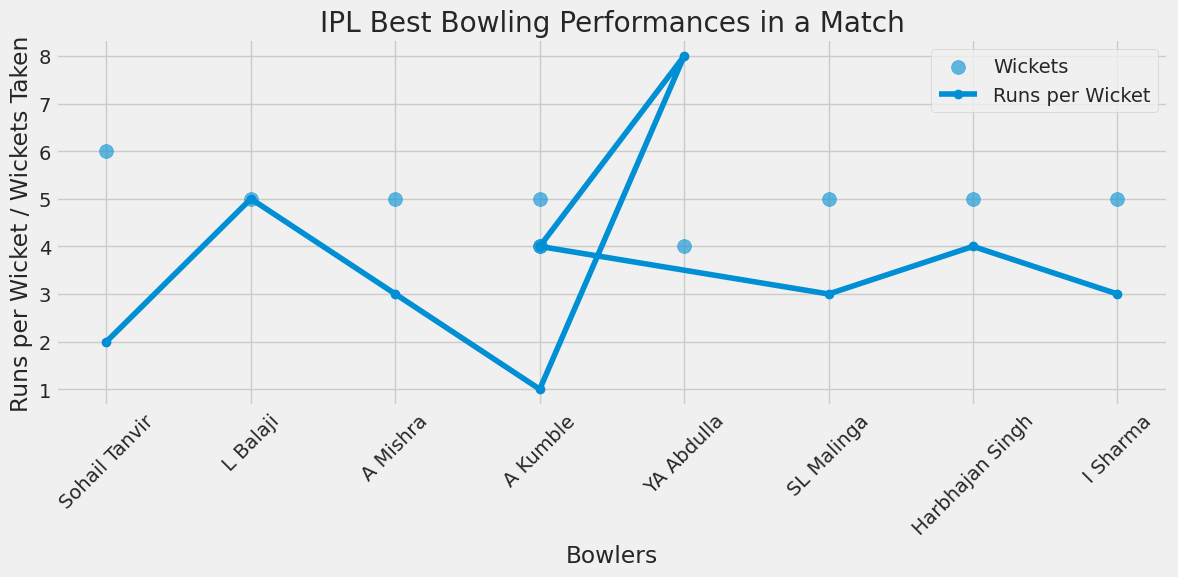

In [35]:
match_bowler_performance['Runs per Wicket'] = np.round(match_bowler_performance['Runs Conceded']/match_bowler_performance['Wickets'],0)


plt.figure(figsize=(12,6))
plt.scatter(match_bowler_performance['bowler'],match_bowler_performance['Wickets'],label='Wickets',s=100,alpha=0.6)
plt.plot(match_bowler_performance['bowler'],match_bowler_performance['Runs per Wicket'],marker='o',label='Runs per Wicket')
plt.title('IPL Best Bowling Performances in a Match')
plt.xlabel('Bowlers')
plt.ylabel('Runs per Wicket / Wickets Taken')
plt.legend()
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

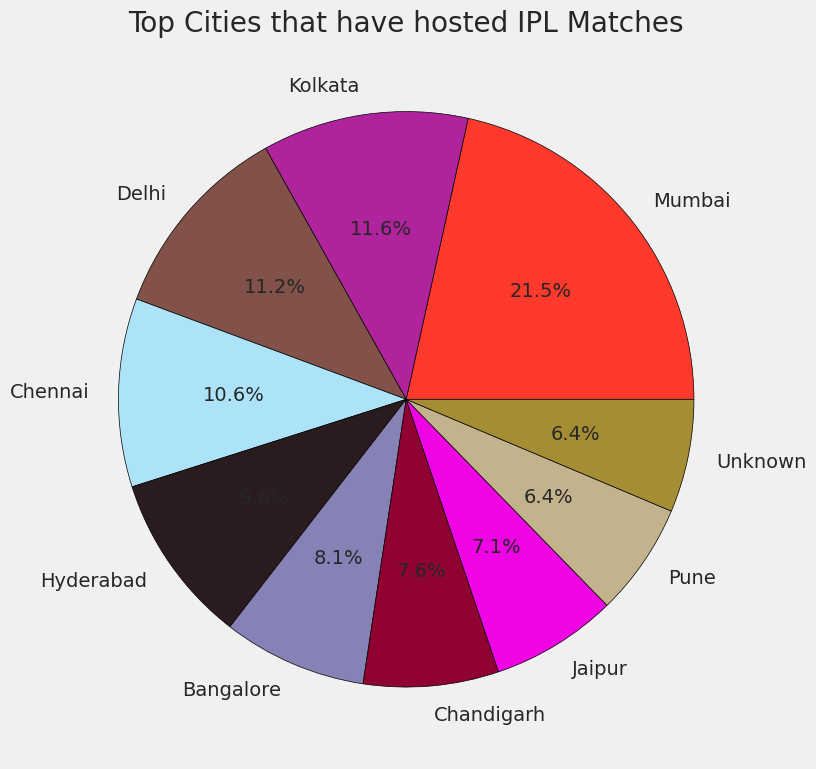

In [36]:
top_cities = matches['city'].value_counts().reset_index(name='Match Count')[:10]

plt.figure(figsize=(8,8))
plt.pie(top_cities['Match Count'], labels = top_cities['city'],colors=random_colors(10),
       autopct='%1.1f%%', wedgeprops=dict(edgecolor='black'))
plt.title('Top Cities that have hosted IPL Matches')
plt.tight_layout()
plt.show()


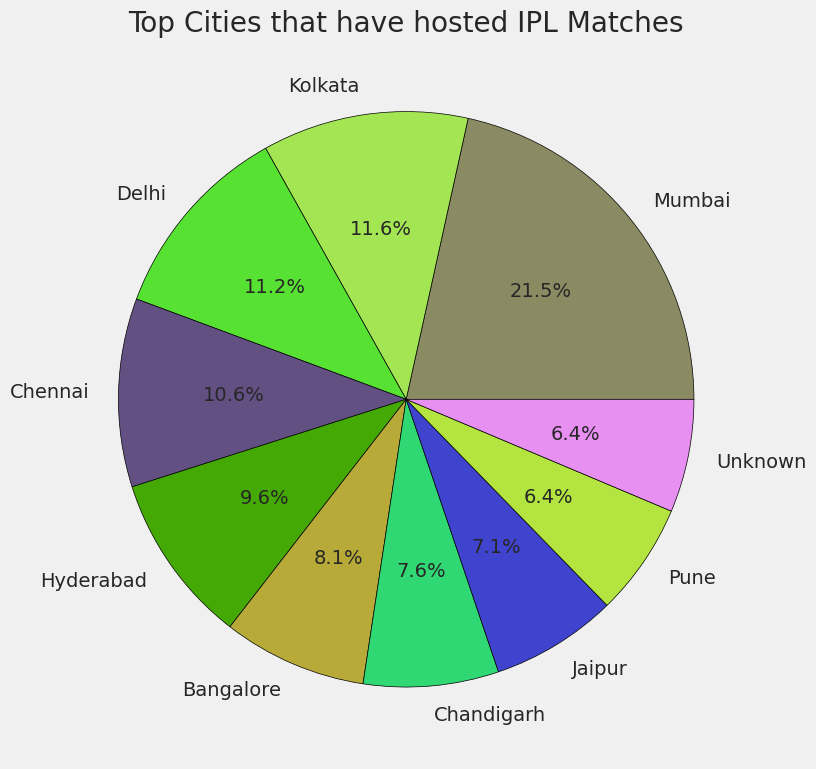

In [37]:
top_cities = matches['city'].value_counts().reset_index(name='Match Count')[:10]

plt.figure(figsize=(8,8))
plt.pie(top_cities['Match Count'], labels = top_cities['city'],colors=random_colors(10),
       autopct='%1.1f%%', wedgeprops=dict(edgecolor='black'))
plt.title('Top Cities that have hosted IPL Matches')
plt.tight_layout()
plt.show()


<ipython-input-38-ff24090eb061>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dismissal_kind',data=deliveries,palette=random_colors(len(deliveries['dismissal_kind'].value_counts())))


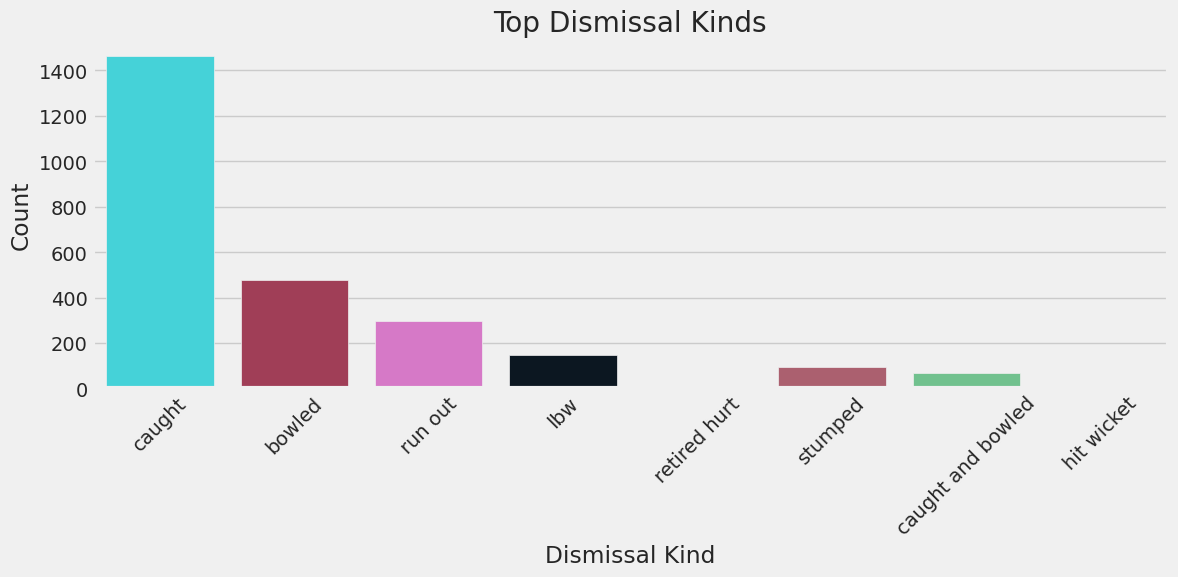

In [38]:
plt.figure(figsize=(12,6))
sns.countplot(x='dismissal_kind',data=deliveries,palette=random_colors(len(deliveries['dismissal_kind'].value_counts())))
plt.title('Top Dismissal Kinds')
plt.xlabel('Dismissal Kind')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

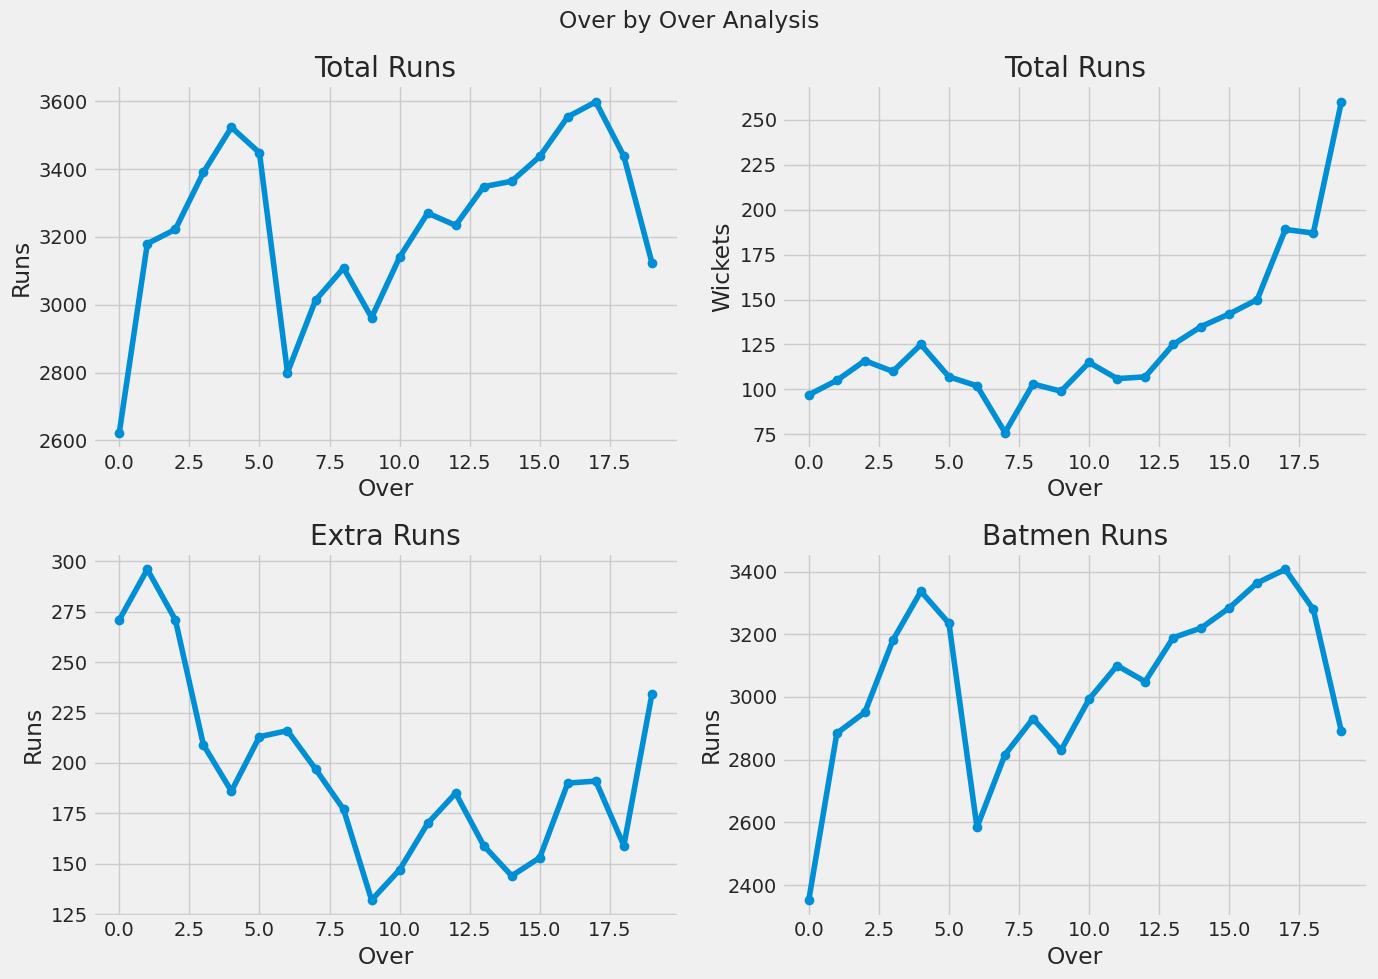

In [39]:
over_summary = deliveries.groupby('over')[['total_runs','is_wicket','extra_runs','batsman_runs']].sum()

fig, axes = plt.subplots(2,2,figsize=(14,10))
fig.suptitle('Over by Over Analysis')


axes[0,0].plot(over_summary.index,over_summary['total_runs'],marker='o')
axes[0,0].set_title('Total Runs')
axes[0,0].set_xlabel('Over')
axes[0,0].set_ylabel('Runs')

axes[0,1].plot(over_summary.index,over_summary['is_wicket'],marker='o')
axes[0,1].set_title('Total Runs')
axes[0,1].set_xlabel('Over')
axes[0,1].set_ylabel('Wickets')

axes[1,0].plot(over_summary.index,over_summary['extra_runs'],marker='o')
axes[1,0].set_title('Extra Runs')
axes[1,0].set_xlabel('Over')
axes[1,0].set_ylabel('Runs')

axes[1,1].plot(over_summary.index,over_summary['batsman_runs'],marker='o')
axes[1,1].set_title('Batmen Runs')
axes[1,1].set_xlabel('Over')
axes[1,1].set_ylabel('Runs')

plt.tight_layout()
plt.show()

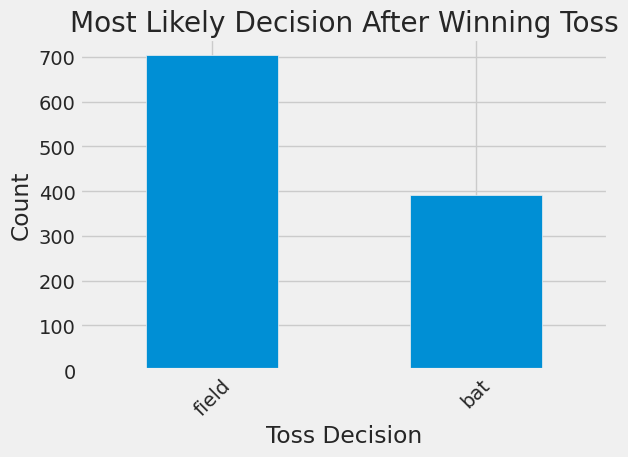

In [40]:
matches['toss_decision'].value_counts().plot(kind='bar')
plt.title('Most Likely Decision After Winning Toss')
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()